# HW6: Clustering Data with Gaussian Mixture Model

### Evan James Heetderks / 高修杰 / 2019280025

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import six
from six.moves import range
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
X = np.loadtxt('iris.data', dtype='object', delimiter=',')
Y = X[:,-1]
X = X[:, :-1].astype('f')
X.shape, Y.shape, Y.dtype

((150, 4), (150,), dtype('O'))

`X` is a `NxK` float matrix where each row (`X[i]`) corresponds to a data point.

In [4]:
def gmm(X, n_classes, n_iter):
    cov = []
    for i in range(n_classes): cov.append(make_spd_matrix(X.shape[1]))
    cov = np.array(cov)
    mean = np.random.choice(X.flatten(), (n_classes, X.shape[1]))
    weight = np.ones((n_classes))/n_classes
    
    for step in range(n_iter):
        likelihood = []
        for j in range(n_classes): likelihood.append(multivariate_normal.pdf(x=X, mean=mean[j], cov=cov[j], allow_singular=True))
        likelihood = np.array(likelihood)
        probability = []
        for k in range(n_classes):
            probability.append((likelihood[k]*weight[k])/(np.sum([likelihood[i]*weight[i] for i in range(n_classes)], axis=0)+0.000001))
            mean[k] = np.sum(probability[k].reshape(len(X),1)*X, axis=0) / (np.sum(probability[k]+0.000001))
            cov[k] = np.dot((probability[k].reshape(len(X),1)*(X-mean[k])).T, (X-mean[k])) / (np.sum(probability[k])+0.000001)
            weight[k] = np.mean(probability[k])

    likelihood2 = []
    for l in range(n_classes): likelihood2.append(multivariate_normal.pdf(x=X, mean=mean[l], cov=cov[l], allow_singular=True))
    likelihood2 = np.array(likelihood2)
    class_assignments = np.argmax(likelihood2, axis=0)
    
    return class_assignments, mean, cov

## Visualization: a Cross Section (3 clusters, 500 iterations)

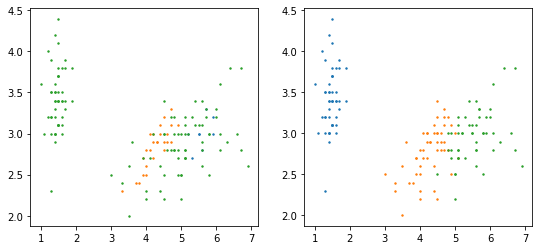

In [5]:
class_assignments, mean, cov = gmm(X, 3, 500)  # You may want to tune the number of iterations
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(X[class_assignments==k, 2], X[class_assignments==k, 1], s=2)
plt.subplot(122)
for k, class_name in enumerate(np.unique(Y)):
    plt.scatter(X[Y==class_name, 2], X[Y==class_name, 1], s=2)

## Visualization: PCA Projection (3 clusters, 500 iterations)

In [6]:
evals, evecs = np.linalg.eigh(np.cov(X.T))
to_crd = lambda x: ((x-x.mean(axis=0))@evecs)[:,-2:]
crds = to_crd(X)

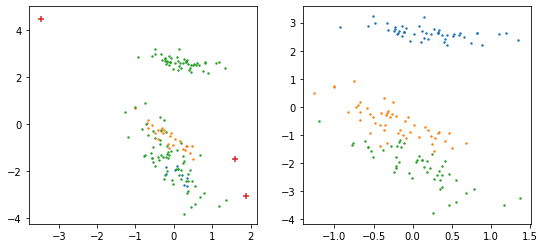

In [7]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(crds[class_assignments==k, 0], crds[class_assignments==k, 1], s=2)
plt.scatter(to_crd(mean)[:,0], to_crd(mean)[:,1], s=30, marker='+')
plt.subplot(122)
for k in np.unique(Y):
    plt.scatter(crds[Y==k, 0], crds[Y==k, 1], s=2)

## Visualization: a Cross Section (3 clusters, 300 iterations)

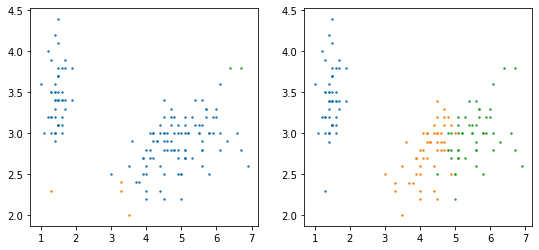

In [8]:
class_assignments, mean, cov = gmm(X, 3, 300)  # You may want to tune the number of iterations
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(X[class_assignments==k, 2], X[class_assignments==k, 1], s=2)
plt.subplot(122)
for k, class_name in enumerate(np.unique(Y)):
    plt.scatter(X[Y==class_name, 2], X[Y==class_name, 1], s=2)

## Visualization: PCA Projection (3 clusters, 300 iterations)

In [9]:
evals, evecs = np.linalg.eigh(np.cov(X.T))
to_crd = lambda x: ((x-x.mean(axis=0))@evecs)[:,-2:]
crds = to_crd(X)

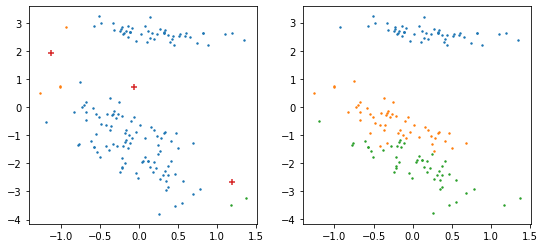

In [10]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(crds[class_assignments==k, 0], crds[class_assignments==k, 1], s=2)
plt.scatter(to_crd(mean)[:,0], to_crd(mean)[:,1], s=30, marker='+')
plt.subplot(122)
for k in np.unique(Y):
    plt.scatter(crds[Y==k, 0], crds[Y==k, 1], s=2)

## Visualization: a Cross Section (3 clusters, 100 iterations)

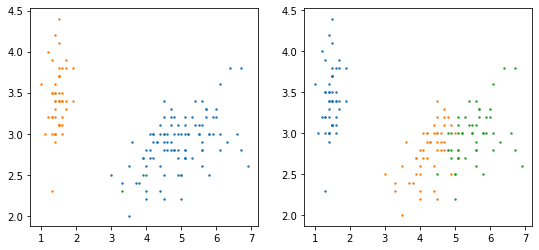

In [11]:
class_assignments, mean, cov = gmm(X, 3, 100)  # You may want to tune the number of iterations
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(X[class_assignments==k, 2], X[class_assignments==k, 1], s=2)
plt.subplot(122)
for k, class_name in enumerate(np.unique(Y)):
    plt.scatter(X[Y==class_name, 2], X[Y==class_name, 1], s=2)

## Visualization: PCA Projection (3 clusters, 100 iterations)

In [12]:
evals, evecs = np.linalg.eigh(np.cov(X.T))
to_crd = lambda x: ((x-x.mean(axis=0))@evecs)[:,-2:]
crds = to_crd(X)

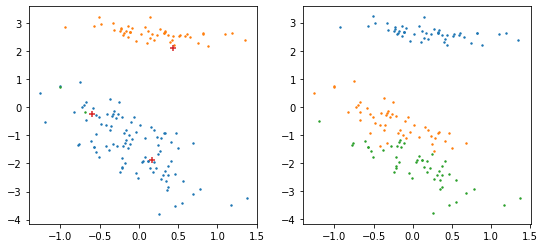

In [13]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(crds[class_assignments==k, 0], crds[class_assignments==k, 1], s=2)
plt.scatter(to_crd(mean)[:,0], to_crd(mean)[:,1], s=30, marker='+')
plt.subplot(122)
for k in np.unique(Y):
    plt.scatter(crds[Y==k, 0], crds[Y==k, 1], s=2)